# Title

## 1. Introduction
(small intro text)



## 2. Dataset exploration
This dataset provides key demographic figures for the population of the Netherlands from 1950 to 2022. It includes information on population size, age distribution, marital status, migration background, household composition, and population growth. The data is sourced from Statistics Netherlands (CBS): https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=37296eng&_theme=1155

With 73 rows and 79 columns, this dataset provides a comprehensive view of demographic trends over time, making it well-suited for analyzing long-term changes in age distribution and other related factors.

In [5]:
# Libraries for this notebook
import pandas as pd
import matplotlib.pyplot as plt
from process_data import dataset_cleanup

In [6]:
# Load the dataset
df_raw = pd.read_csv("population_dataset_raw.csv", delimiter=";", encoding="utf-8", dtype=str)

# Display first few rows
display(df_raw.head())

,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,NeverMarried_5,Married_6,Widowed_7,Divorced_8,...,LiveBirths_69,Deaths_70,NaturalIncrease_71,NaturalIncreaseRate_72,Immigration_73,EmigrationIncludingAdministrati_74,NetMigrationIncludingAdministrativ_75,NetMigrationIncludingAdminRate_76,OtherCorrections_77,PopulationDensity_78
0,0,1950JJ00,10026773,4998251,5028522,10026773,5284496,4232241,435532,74504,...,229718,75929,153789,15.2,70602,50697,19905,2,-187,309
1,1,1951JJ00,10200280,5083759,5116521,10200280,5354293,4329761,439933,76293,...,228407,77560,150847,14.7,45016,67449,-22433,-2.2,-351,315
2,2,1952JJ00,10328343,5145772,5182571,10328343,5384853,4421572,444343,77575,...,231888,76346,155542,15,33666,81347,-47681,-4.6,-573,319
3,3,1953JJ00,10435631,5198033,5237598,10435631,5409984,4497526,449090,79031,...,227964,80901,147063,14,35449,67080,-31631,-3,-326,322
4,4,1954JJ00,10550737,5256108,5294629,10550737,5443474,4572974,454436,79853,...,228173,79623,148550,14,42418,61368,-18950,-1.8,-314,325


In [7]:
# Create a copy of the raw dataset to work with (because passing a dataframe as an argument will pass the reference)
df = df_raw.copy()

# Clean up the dataset
df = dataset_cleanup(df)

# Display first few rows of the cleaned dataset
display(df.head())

,ID,Year,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,NeverMarried_5,Married_6,Widowed_7,Divorced_8,...,LiveBirths_69,Deaths_70,NaturalIncrease_71,NaturalIncreaseRate_72,Immigration_73,EmigrationIncludingAdministrati_74,NetMigrationIncludingAdministrativ_75,NetMigrationIncludingAdminRate_76,OtherCorrections_77,PopulationDensity_78
0,0,1950,10026773,4998251,5028522,10026773,5284496,4232241,435532,74504,...,229718,75929,153789,15.2,70602,50697,19905,2,-187,309
1,1,1951,10200280,5083759,5116521,10200280,5354293,4329761,439933,76293,...,228407,77560,150847,14.7,45016,67449,-22433,-2.2,-351,315
2,2,1952,10328343,5145772,5182571,10328343,5384853,4421572,444343,77575,...,231888,76346,155542,15,33666,81347,-47681,-4.6,-573,319
3,3,1953,10435631,5198033,5237598,10435631,5409984,4497526,449090,79031,...,227964,80901,147063,14,35449,67080,-31631,-3,-326,322
4,4,1954,10550737,5256108,5294629,10550737,5443474,4572974,454436,79853,...,228173,79623,148550,14,42418,61368,-18950,-1.8,-314,325


## 3. Data analysis
In this section, key demographic trends in the Netherlands are explored based on historical population data from 1950 to 2022. Four separate analyses were conducted, each focusing on a specific aspect of population dynamics. These analyses aim to provide insights into long-term changes based on factors given by the dataset as explained earlier.

### 3.1 Analysis 1: Age distribution over time
Understanding how the age distribution of a population evolves over time is crucial for making the right decisions in the Netherlands in the coming years, and has a big impact on many political parties. Changes in the proportion of different age groups can impact labor markets, healthcare demand, pension systems, and overall economic growth. In this analysis, the age distribution of the Dutch population from 1950 to 2022 is going to be examined.

A fitting research question for this would be: \
How has the proportion of different age groups in the Dutch population changed over time, and what trends can be observed in the aging of the population?

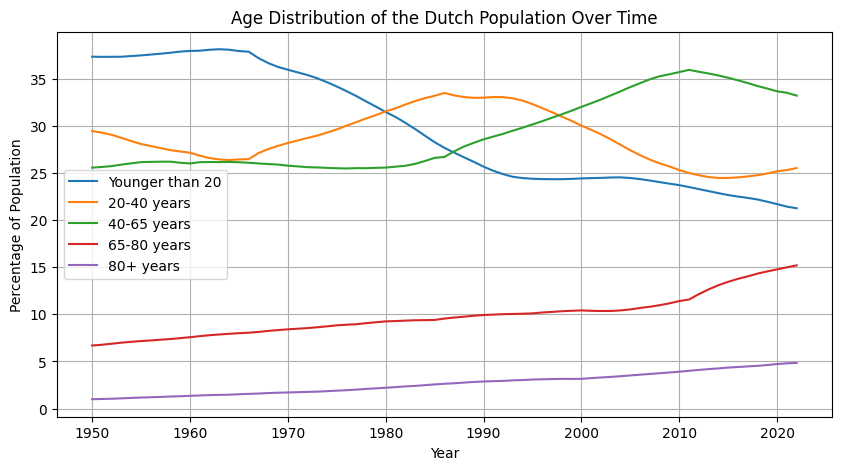

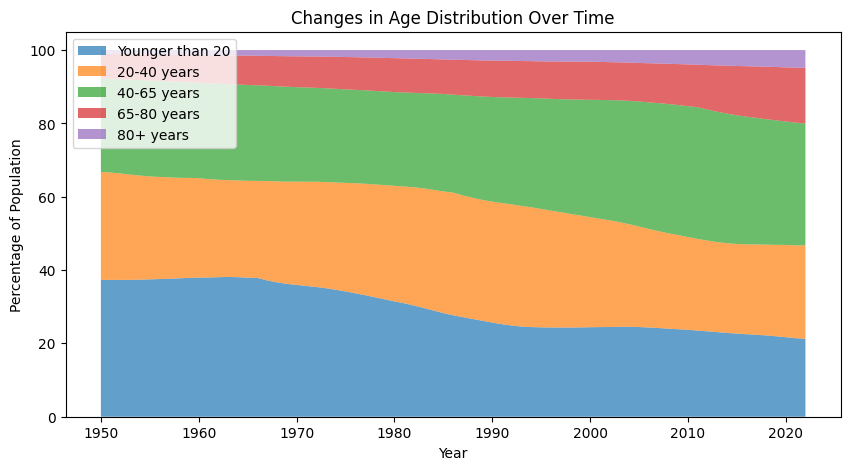

In [8]:
# Create clean relevant columns for this analysis
age_columns = {
    "YoungerThan20Years_10": "Younger than 20",
    "k_20To40Years_11": "20-40 years",
    "k_40To65Years_12": "40-65 years",
    "k_65To80Years_13": "65-80 years",
    "k_80YearsOrOlder_14": "80+ years"
}
df_age = df[["Year"] + list(age_columns.keys())].apply(pd.to_numeric)

# Drop rows with missing values
df_age.dropna(inplace=True)

# Normalize age groups as percentages of total population
df_age["Total"] = df_age[list(age_columns.keys())].sum(axis=1)
for col in age_columns.keys():
    df_age[col] = (df_age[col] / df_age["Total"]) * 100

# Sort by Year
df_age.sort_values("Year", inplace=True)

# Plot age distribution trends over time
plt.figure(figsize=(10, 5))
for col, label in age_columns.items():
    plt.plot(df_age["Year"], df_age[col], label=label)
plt.xlabel("Year")
plt.ylabel("Percentage of Population")
plt.title("Age Distribution of the Dutch Population Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Stacked area chart to show age distribution evolution
plt.figure(figsize=(10, 5))
plt.stackplot(df_age["Year"], [df_age[col] for col in age_columns.keys()], labels=age_columns.values(), alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Percentage of Population")
plt.title("Changes in Age Distribution Over Time")
plt.legend(loc="upper left")
plt.show()

### Concolusion of analysis 1
As can be seen in the graphs above, the age group of less than 20 years old has been declining since 1966 and hasnt stopped since, a big drop from 38% (1966) to 22% (2023) can be seen. The group 20-40 year olds has seen some rises and falls over the years around the 30% mark, and has been climbing again from 24% since 2013. The group 40-65 year olds has been climbing till 2011 with peak of 36% and has been falling since. The group of 65-80 year olds has been steadily climbing from 7% since the beginning of this dataset and the climb has accelerated since 2011 to arounf 15% in 2023. The oldest age group of 80+ years has also been steadily climbing since the beginning of the dataset but has seen no acceleration of decelerations, the rise started at 2% and is now at 5%.

The analysis of age distribution trends in the Netherlands reveals significant demographic shifts over the past decades. The proportion of individuals younger than 20 has been steadily declining since 1966, indicating lower birth rates or changing population dynamics. Meanwhile, the working-age groups (20-40 years and 40-65 years) have fluctuated  indicating variations in employment trends, migration patterns, and generational shifts within the labor force. The older groups (65-80 years and 80+ years) Have been steadily climbing indicating possible increased life expectancy, improved healthcare, and an aging population that may place greater demands on social services and pension systems in the future.

### 3.2 Analysis 2
(explanation analysis 2)

In [ ]:
# Code for analysis 2

### 3.3 Analysis 3
(explanation analysis 3)

In [ ]:
# Code for analysis 3

### 3.4 Analysis 4
(explanation analysis 4)

In [ ]:
# Code for analysis 4

## 4. Conclusion and Discussion
(text about the conclusion and discussion of our analyses)

In [ ]:
# This last cell keeps coming back if you edit the conclusion and discussions markdown cell, so delete this before handing in.